# Sprint 4 - GustavoFranco

## Tema: Inferencia estadística

## Título: Informe de análisis de datos para la compra de una vivienda

## Repositorio en Github: [Búsqueda de Vivienda](https://github.com/gfrancoarq/busqueda-de-vivienda)

## Enunciado

Del sitio web Kaggle hemos obtenido la data house.csv, la cual posee el
precio de las casas con diferentes características, por lo que en esta parte se espera que usted pueda aplicar las diferentes técnicas aprendidas en este
módulo.

Usted encontrará dos archivos, uno con la base y otro archivo data.txt con la
descripción de las variables de la data. Para este ejercicio debe tener las
siguientes consideraciones:

Debe cargar la base y eliminar las siguientes variables, Alley, FireplaceQu,
PoolQC, Fence, MiscFeature, LotFrontage. Luego realice un resumen
estadístico con las variables que han quedado en la base.

Luego que conozca las características de la base de trabajo, usted ha sido
contratado para realizar una recomendación de oferta para el adulto joven
recién egresado de la universidad que está en búsqueda de casa, para esto
debe formar parte de su análisis lo siguiente:

- Variables que distribuyen normal (en caso contrario, sugiere otra)
- Si le parece adecuado, puede realizar un remuestreo si la base le
parece muy grande (este apartado no lleva puntaje, pero se agregaron
3 puntos).
- Construya Intervalos de confianza
- Testee hipótesis que apoyen/no apoyen las ofertas de compra.

Se espera que hagan comentarios de los resultados que obtenga y no solo
números. Agregue gráficos que complementen su estudio (al menos unos
tres gráficos). Debe entregar un pdf con sus conclusiones y un código .py
incluya los códigos usados.

## 0. Actividades iniciales

1. Cargar la base

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Rutas de archivos
house_path='house.csv'

# Creamos el data frame con pandas
df_house = pd.read_csv(house_path)

df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Eliminar las variables indicadas:

*Alley, FireplaceQu, PoolQC, Fence, MiscFeature, LotFrontage*

In [2]:
columns_eliminar = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage']
df_house.drop(columns=columns_eliminar, inplace=True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

3. Ahora realizamos un resumen estadístico con las 74 variables que han quedado en la base.

In [3]:
# Lo primero para la limpieza de datos es contabilizar los NaN e identificar las columnas que los contienen
nan_counts = df_house.isna().sum()
nan_columns = nan_counts[nan_counts > 0]

nan_columns

MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [4]:
# Ahora trabajamos por separado las variables numéricas y categóricas

# En las variables numéricas imputamos usando la mediana
num_columns_with_nan = ['MasVnrArea', 'GarageYrBlt']
for column in num_columns_with_nan:
  df_house[column].fillna(df_house[column].median(), inplace=True)

# En las variables categóricas imputamos asignando el valor 'Desconocido'
cat_columns_with_nan = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for column in cat_columns_with_nan:
  df_house[column].fillna('Desconocido', inplace=True)

# Ahora revisamos los valores NaN
nan_counts = df_house.isna().sum()
nan_columns = nan_counts[nan_counts > 0]

nan_columns


Series([], dtype: int64)

In [5]:
# Y con los datos limpios, procedemos al Resumen Estadístico
summary_statistics = df_house.describe()
summary_statistics.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000


## 1. Introducción: Análisis Inicial del encargo

El objetivo de este análisis es apoyar a un adulto joven recién egresado de la universidad en la búsqueda de una vivienda, considerando su capacidad de pago y sus necesidades.

### Ciudad y datos

Debido a que no se indica la ciudad específica a la que corresponde el conjunto de datos ("data.csv"), se presume que se trata de una ciudad de Estados Unidos (EEUU), dado que se utilizan unidades de medida de dinero en USD, así como medidas de superficie en pies cuadrados ("sq feet").

### Usuario objetivo y capacidad de pago

Para efectos del ejercicio de recomendación de vivienda a nuestro usuario objetivo, se consideró que se trata de un profesional recién egresado en EEUU, que tiene un salario promedio, correspondientes a 80.000 USD anuales. Con este número utilizamos una calculadora de capacidad crediticia de [NerdWallet](https://www.nerdwallet.com/mortgages/mortgage-calculator), herramienta con la que pudimos definir los siguientes parámetros para nuestro usuario objetivo:

Considerando un escenario con un pago inicial del 30%, cliente sin deuda actual, gastos moderados y un aval con buen crédito, un profesional recién egresado con un salario de 80,000 USD, podría acceder a una casa con un valor de aproximadamente 180,000 USD.


## 2. Desarrollo:

### Definición de las variables clave

Con la finalidad de realizar la recomendación de ofertas, para el cliente objetivo definido, correspondiente a un adulto joven recién egresado en busca de primera casa, se han identificado 3 aspectos claves que debemos reconocer a través de las variables. El primero es lógicamente el precio, el segundo aspecto es el tamaño de la casa (superficie) y el tercer aspecto clave en el precio de una vivienda, es la localización.

### Valor de la Localización

Para este tercer punto, no existe ninguna serie específica en el conjunto de datos que nos proporcione información concreta respecto a las condiciones de localización de las casas, sin embargo, existe una variable denominada 'Neighborhood', que indica el barrio en el que se encuentra la propiedad.



In [6]:
# Veamos cuántos barrios tiene el data frame

# Contar el número de barrios únicos
barrios_unicos = df_house['Neighborhood'].unique()
numero_barrios = len(barrios_unicos)

# Mostrar la cantidad de barrios
print(f"Número de barrios en el dataset: {numero_barrios}")

Número de barrios en el dataset: 25


Como se puede apreciar al ejecutar el código precedente, existen 25 barrios en la ciudad, identificados en el data frame, y aunque en este caso no conocemos la ciudad analizada, si es posible asumir que al igual que ocurre en cualquier ciudad o asentamiento humano, la localización dentro de ella es un atributo muy significativo en el valor del suelo, de hecho en ciudades muy desarrolladas, es más costosa una vivienda minúscula en el centro de la ciudad, que una casa grande ubicada en la periferia o en sectores suburbanos, justamente por el valor del suelo en esa localización.

Con lo anterior, se define para este análisis, que es posible establecer la calidad de esos barrios, identificando el precio promedio de las viviendas por barrio, y por tanto es posible reconocer el "valor que aporta" dicha localización.

In [7]:
# Calcular el precio medio por barrio
precios_por_barrio = df_house.groupby('Neighborhood')['SalePrice'].mean()

# Ordenar por precio medio ascendente
precios_por_barrio_ordenados = precios_por_barrio.sort_values(ascending=True)

# Mostrar los barrios más baratos
print("Barrios más baratos:")
print(precios_por_barrio_ordenados.head())

Barrios más baratos:
Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
Name: SalePrice, dtype: float64


### Cálculo del valor de la localización

Con lo anterior, se define para este análisis, que es posible establecer ese valor de la localización, identificando el precio promedio de las viviendas por barrio, lo que nos permite reconocer el "valor que aporta" dicha localización.

De esta forma, con los barrios ordenados por su precio promedio, en forma ascendente, se determina crear una nueva variable, denominada 'valor_localizacion'.

Este valor corresponde a un índice que va de 1 a 25, número definido por la posición del barrio en cuestión, respecto a los otros barrios, es decir, 1 es el barrio más barato, donde la localización no aporta mucho valor, y 25 es el barrio más caro, donde la localización aporta mucho valor. Este método asume una relación lineal entre el precio y el valor de la localización. En la práctica, esa relación puede ser un poco más compleja.



In [8]:
# Crear variable temporal
posicion = pd.Series(range(1, len(precios_por_barrio_ordenados) + 1), index=precios_por_barrio_ordenados.index)

# Agregar la variable 'valor_localizacion'
df_house = df_house.merge(posicion.to_frame(name='valor_localizacion'), how='left', on='Neighborhood')

# Verifiquemos esta nueva columna
# Agrupar por 'Neighborhood'
df_agrupado = df_house.groupby('Neighborhood')

# Ordenar por 'valor_localizacion' y mostrar
print(df_agrupado[['Neighborhood', 'valor_localizacion', 'SalePrice']].head(25).sort_values(by='valor_localizacion', ascending=False))

     Neighborhood  valor_localizacion  SalePrice
691       NoRidge                  25     755000
318       NoRidge                  25     260000
564       NoRidge                  25     268000
541       NoRidge                  25     248000
524       NoRidge                  25     315750
...           ...                 ...        ...
1039      MeadowV                   1      80000
1038      MeadowV                   1      97000
915       MeadowV                   1      75000
23        MeadowV                   1     129900
1449      MeadowV                   1      92000

[547 rows x 3 columns]


### Visualización de las variables clave

Ahora, comencemos nuestro análisis y visualización de datos para las 3 variables definidas:
- 'SalePrice' (Precio de Venta)
- 'GrLivArea' (Superficie construida sobre el nivel del suelo). Se asume que considera todo lo construido desde el nivel de suelo hacia arriba, incluyendo todos los pisos, en el caso de que la casa sea de varios pisos, y no incluyendo logicamente la superficie de sótano, que nos parece una variable no tan significativa en el precio.
- 'valor_localizacion'. Que es la variable creada para cuantificar la calidad del barrio, y el aporte de esa condición en el precio de la vivienda. Esto nos va a permitir por ejemplo, recomendar ciertos barrios a nuestro usuario objetivo, de acuerdo a su capacidad de pago.


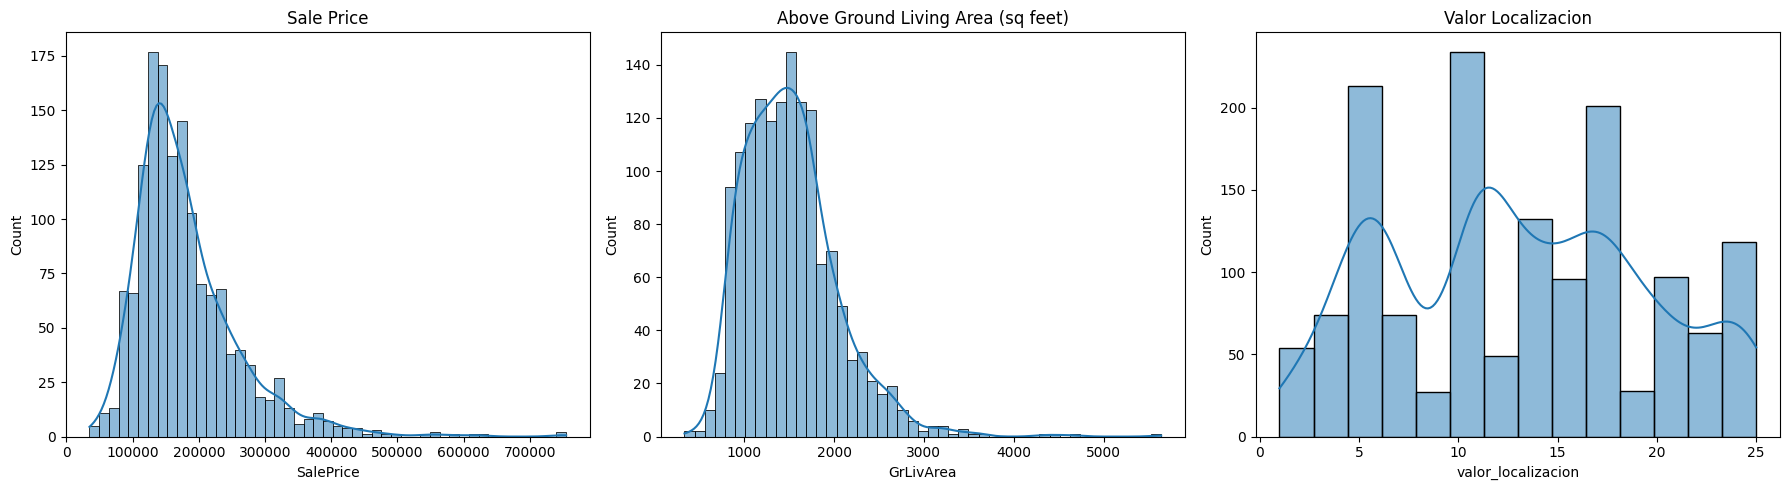

In [27]:
# Grafiquemos SalePrice, GrLivArea y valor_localizacion, para identificar la distribución de nuestras muestras
fig, axes = plt.subplots(1,3, figsize=(18,5))

# SalePrice
sns.histplot(df_house['SalePrice'], kde=True, ax=axes[0])
axes[0].set_title('Sale Price')

# GrLivArea
sns.histplot(df_house['GrLivArea'], kde=True, ax=axes[1])
axes[1].set_title('Above Ground Living Area (sq feet)')

# valor_localizacion
sns.histplot(df_house['valor_localizacion'], kde=True, ax=axes[2])
axes[2].set_title('Valor Localizacion')

plt.tight_layout()
plt.show()


Los gráficos resultan interesantes ya que por un lado el precio y la superficie, tienen una distribución que tiende a normal, con cierta asimetría que tiende hacia valores más altos, mientras que nuestra variable del valor de la localización, no genera este tipo de distribución, sino que es mucho más homogénea, dando cuenta de que existen muchas de nuestras muestras distribuidas de forma más o menos equitativa en los diferentes barrios.

### Relación entre precio, superficie y valor de la localización

Veamos ahora cómo se comporta el precio (en el eje y) cuando nuestras variables de superficie de la casa y de valor de localización, van aumentando. Para efectos de entender las unidades de medida, convertiremos los pies cuadrados ("sq feet") a metros cuadrados.

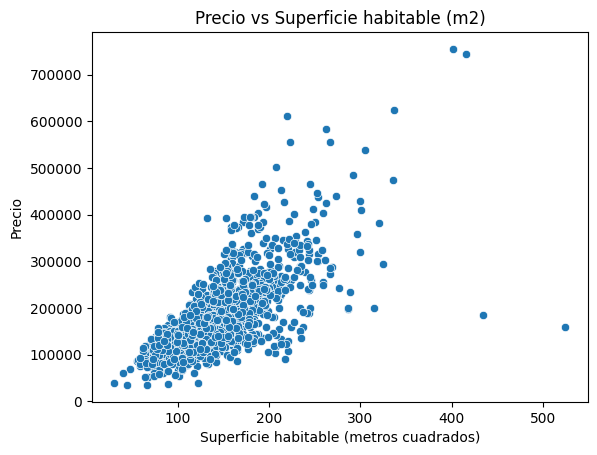

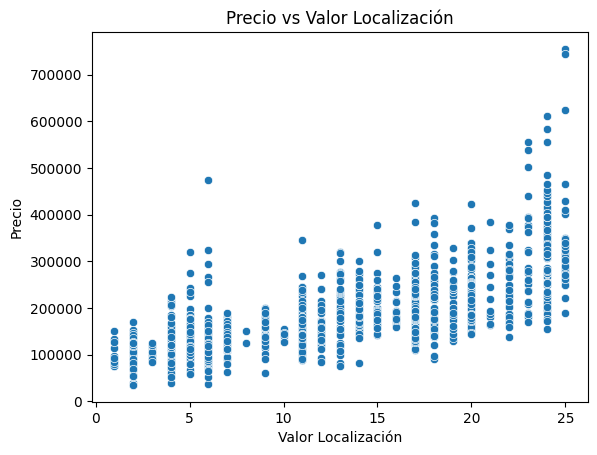

In [10]:
# Agregar una nueva columna con la superficie en metros cuadrados
df_house['GrLivArea_m2'] = df_house['GrLivArea'] * 0.09290304

# Primer gráfico, relación entre tamaño y precio
df_plot = df_house[['SalePrice', 'GrLivArea_m2']]

# Crear un scatter plot
sns.scatterplot(x='GrLivArea_m2', y='SalePrice', data=df_plot)
plt.title('Precio vs Superficie habitable (m2)')
plt.xlabel('Superficie habitable (metros cuadrados)')
plt.ylabel('Precio')
plt.show()

# Segundo gráfico, relación entre localización y precio
df_plot = df_house[['SalePrice', 'valor_localizacion']]

# Crear un scatter plot
sns.scatterplot(x='valor_localizacion', y='SalePrice', data=df_plot)
plt.title('Precio vs Valor Localización')
plt.xlabel('Valor Localización')
plt.ylabel('Precio')
plt.show()


Los gráficos son muy interesantes, y muestran una tendencia lógica y una correlación natural, aunque pareciera que probablemente existen muchos valores atípicos ("outliers") que pueden estar distorsionando la información y los gráficos.

### Eliminación de Outliers con IQR

El IQR (Rango Intercuartílico) es una medida de dispersión estadística utilizada para identificar valores atípicos ("outliers") en un conjunto de datos. Representa la diferencia entre el percentil 75 (Q3) y el percentil 25 (Q1) del conjunto de datos.

In [11]:
# Función para eliminar outliers
def remove_outliers(df, column):
  Q1 = df_house[column].quantile(0.25)
  Q3 = df_house[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df_house[column] >= lower_bound) & (df_house[column] <= upper_bound)]

# Ahora eliminemos los outliers de nuestras 3 variables
df_cleaned = remove_outliers(df_house, 'valor_localizacion')
df_cleaned = remove_outliers(df_cleaned, 'SalePrice')
df_cleaned = remove_outliers(df_cleaned, 'GrLivArea')


<ipython-input-11-9554e6fd68c8>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[(df_house[column] >= lower_bound) & (df_house[column] <= upper_bound)]


Ahora observemos nuevamente la relación entre precio, tamaño y localización, sin la interferencia de los outliers

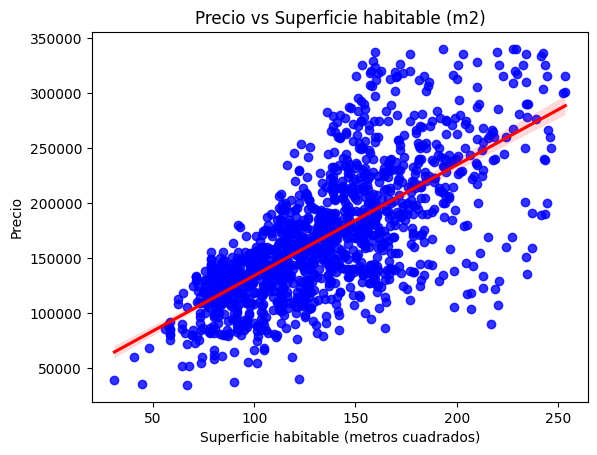

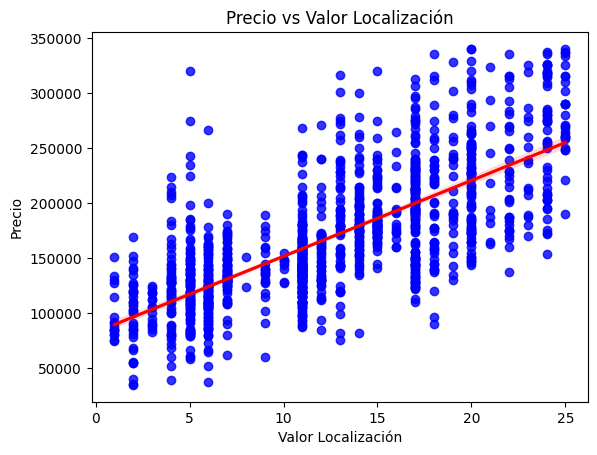

In [12]:
# Primer gráfico, relación entre tamaño y precio
df_plot = df_cleaned[['SalePrice', 'GrLivArea_m2']]

# Agreguemos una línea de regresión roja
sns.regplot(x='GrLivArea_m2', y='SalePrice', data=df_plot, color='red',
            scatter_kws={'color': 'blue'})
plt.title('Precio vs Superficie habitable (m2)')
plt.xlabel('Superficie habitable (metros cuadrados)')
plt.ylabel('Precio')
plt.show()

# Segundo gráfico, relación entre localización y precio
df_cleaned['valor_localizacion'] = df_cleaned['valor_localizacion'].astype('float')

df_plot = df_cleaned[['SalePrice', 'valor_localizacion']]

# Agreguemos una línea de regresión roja
sns.regplot(x='valor_localizacion', y='SalePrice', data=df_plot, color='red',
            scatter_kws={'color': 'blue'})
plt.title('Precio vs Valor Localización')
plt.xlabel('Valor Localización')
plt.ylabel('Precio')
plt.show()


Las lineas de tendencia en rojo permiten reconocer claramente las tendencias, que sin la presencia de outliers, nos permiten una mirada más precisa.

### Gráficos Boxplot

Ahora generemos diagramas de boxplot (caja y bigotes) para nuestras variables.

Los boxplot permiten conocer la posición de la mediana. Si la línea está más o menos en el centro de la caja, habla de una distribución simétrica. Si está más cerca de uno de los bordes, indica asimetría en los datos. Por otro lado, el tamaño de la caja indica la dispersión en los datos medios (usando IQR, Rango Intercuartílico). Una caja más larga (IQR mayor) indica mayor dispersión en los datos, mientras que una caja más corta (IQR menor) indica menor variabilidad. Si los bigotes y la caja son simétricos alrededor de la mediana, los datos son más uniformes. Si la gráfica es asimétrica, puede sugerir sesgo en la distribución.

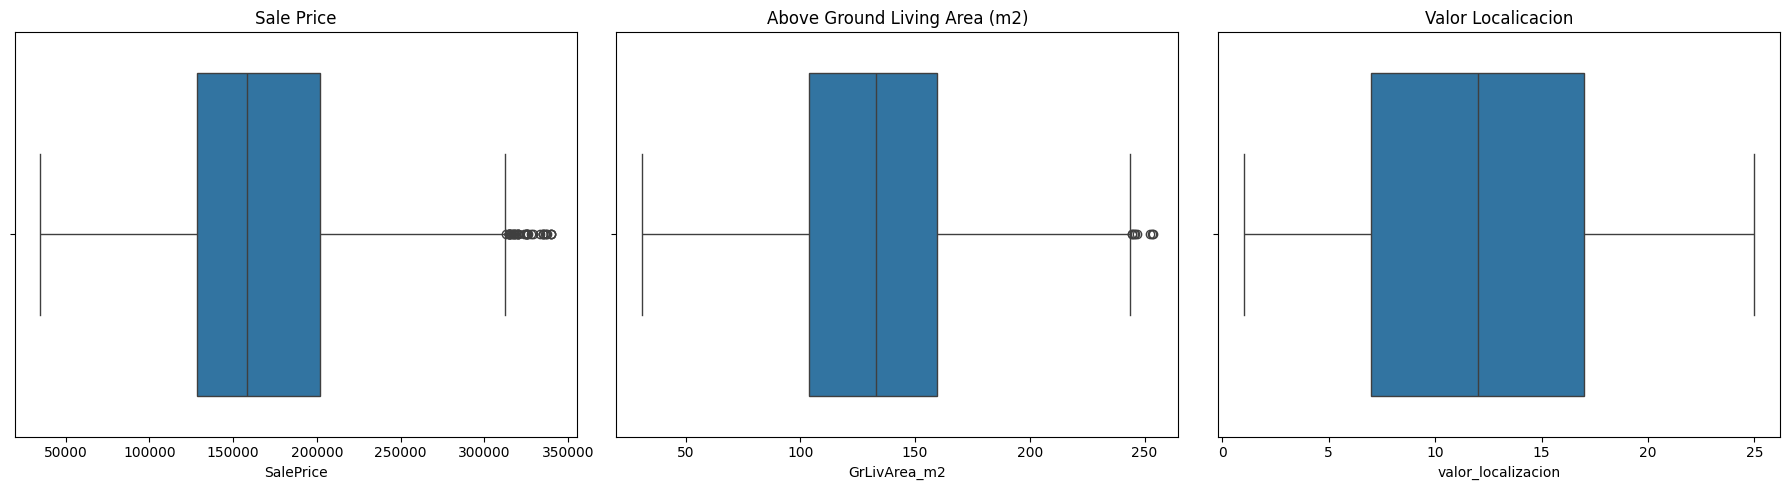

In [13]:
# Ahora generemos diagramas de boxplot (caja y bigotes) para nuestras variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SalePrice
sns.boxplot(x=df_cleaned['SalePrice'], ax=axes[0])
axes[0].set_title('Sale Price')

# GrLivArea_m2
sns.boxplot(x=df_cleaned['GrLivArea_m2'], ax=axes[1])
axes[1].set_title('Above Ground Living Area (m2)')

# valor_localizacion
sns.boxplot(x=df_cleaned['valor_localizacion'], ax=axes[2])
axes[2].set_title('Valor Localicacion')

plt.tight_layout()
plt.show()

### Interpretación de los boxplot

Los diagramas de Boxplot para las tres variables analizadas nos indican por ejemplo que:

- La mediana de precio es del orden de los 160.000 USD, y está algo más cerca del borde inferior de la caja, lo que nos habla de asimetría en los datos, dado que la mayoría de las propiedades (más del 50%) están entre los 130.000 y los 200.000, la mediana está cargada hacia el borde inferior.
Respecto a la superficie, la caja nos indica que la mayoría de las propiedades tienen entre 100 y 160 m2, la mediana está al centro, en los 130 m2, y existen algunos valores atípicos que nos hablan de algunas propiedades de más de 250 m2.
- Respecto al valor de la localización, este gráfico nos cuenta que la mayoría de las propiedades se encuentra entre el 7 y el 17, es decir son barrios promedio, y la mediana es el 12, que es justamente la mitad de la escala. Esto refleja que la ciudad analizada o más bien las muestras de nuestro conjunto de datos, no están cargadas, es decir no existe gran desigualdad en la ciudad, ya que no se aprecia una mayoría de las propiedades ubicadas en sectores caros ni tampoco baratos, sino más bien son un conjunto heterogéneo y bien distribuido equitativamente.

## 3. Resultados: ¿Qué le podemos recomendar a nuestro usuario objetivo?

### Intervalo de confianza y prueba de hipótesis

Para responder esta pregunta, realizaremos un análisis estadístico, considerando lo siguiente:

- Intervalo de confianza: nos permitirá estimar el rango en el que se encuentre el precio verdadero en relación a nuestra estimación.
- Prueba de hipótesis: Utilizaremos el valor definido al inicio del análisis como 'Capacidad de Pago' de nuestro usuario, que pudimos establecer en 180.000 USD. Con las pruebas de hipótesis evaluaremos si los precios de venta promedio son significativamente diferentes o no.

### Formulación de los Intervalos de Confianza y Pruebas de Hipótesis

- Intervalo de Confianza para el Precio de Venta: 95%
- Prueba de Hipótesis: La hipótesis nula (H0) será que el precio de venta promedio es menor o igual a la Capacidad de Pago, mientras que la hipótesis alternativa (H1) será que el precio de venta promedio es mayor a este umbral.

In [14]:
# Ahora obtengamos funciones estadísticas (usando el módulo stats, de la librería scipy)
from scipy import stats
import numpy as np

# Definamos el nivel de confianza
confidence_level = 0.95

# Calculemos el intervalo de confianza para el precio de venta promedio
sale_price_mean = df_cleaned['SalePrice'].mean()
sale_price_std = df_cleaned['SalePrice'].std()
n = len(df_cleaned['SalePrice'])

# Definimos el Z-score para el nivel de confianza del 95%
z_critical = stats.norm.ppf((1 + confidence_level) /2)

# Margen de error
margin_of_error = z_critical * (sale_price_std / np.sqrt(n))

# Intervalo de confianza
confidence_interval = (sale_price_mean - margin_of_error, sale_price_mean + margin_of_error)

# Ahora, definimos la Capacidad de Pago de nuestro usuario objetivo
capacidad_pago = 180000

# Realizamos la prueba de hipótesis
# H0: mu <= capacidad_pago
# H1: mu > capacidad_pago
t_stat, p_value = stats.ttest_1samp(df_cleaned['SalePrice'], capacidad_pago)

# Resultados
print(f"Intervalo de confianza: {confidence_interval}")
print(f"Valor t {t_stat}")
print(f"Valor p {p_value}")

Intervalo de confianza: (166212.86820564882, 172399.55551090938)
Valor t -6.775658306910897
Valor p 1.827685506094002e-11


### Interpretación del intervalo de confianza y significancia estadística



- Interpretación del intervalo de confianza:

El intervalo de confianza (166.212,87, 172.399,56) indica que, con un 95% de confianza, el precio de venta promedio de las casas en el conjunto de datos se encuentra entre esos dos valores. No significa que todas las casas se vendan dentro de ese rango. Habrá casas más baratas y más caras que el precio promedio.

- Significancia estadística:

El valor t y el valor p indican que la diferencia entre la capacidad de pago del usuario objetivo (180.000) y el precio de venta promedio es estadísticamente significativa. Esto significa que es muy poco probable que la diferencia observada se deba al azar.

### Conclusión del análisis estadístico:

Se valida la Hipótesis Nula (H0). El precio promedio de las casas se encuentra dentro del rango de la capacidad de pago del usuario objetivo, y la diferencia entre ambos valores es estadísticamente significativa. Esto significa que es más probable que el usuario objetivo encuentre casas por debajo de su capacidad de pago que por encima de ella.

### Recomendación al usuario objetivo:

Por lo analizado anteriormente, es importante considerar ambos factores, intervalo de confianza y significancia estadística, al tomar una decisión de compra. Si bien el usuario objetivo puede encontrar casas dentro de su rango de capacidad de pago, también es posible que encuentre casas por encima de este límite.

Para apoyar a nuestro usuario objetivo, podemos determinar qué es lo que le alcanza, a partir de su capacidad de pago, para que pueda focalizar su búsqueda.


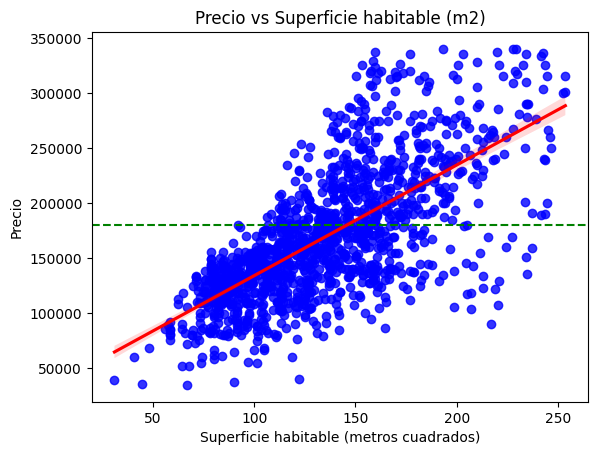

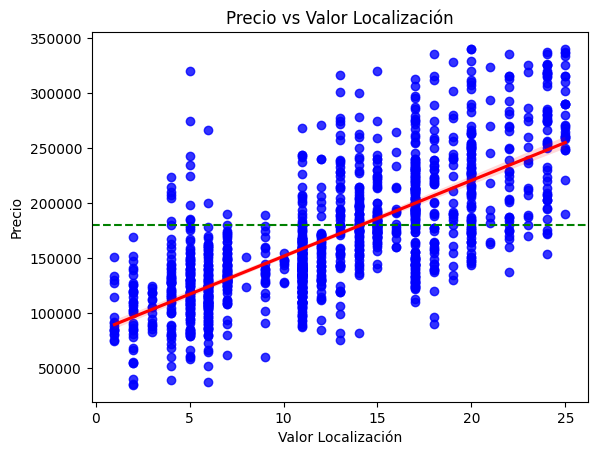

In [19]:
# Primer gráfico, relación entre tamaño y precio
df_plot = df_cleaned[['SalePrice', 'GrLivArea_m2']]

# Agregar una línea horizontal para la capacidad de pago
plt.axhline(y=capacidad_pago, color='green', linestyle='dashed', label='Capacidad de Pago')

# Agreguemos una línea de regresión roja
sns.regplot(x='GrLivArea_m2', y='SalePrice', data=df_plot, color='red',
            scatter_kws={'color': 'blue'})
plt.title('Precio vs Superficie habitable (m2)')
plt.xlabel('Superficie habitable (metros cuadrados)')
plt.ylabel('Precio')
plt.show()


# Segundo gráfico, relación entre localización y precio
df_cleaned['valor_localizacion'] = df_cleaned['valor_localizacion'].astype('float')

df_plot = df_cleaned[['SalePrice', 'valor_localizacion']]

# Agregar una línea horizontal para la capacidad de pago
plt.axhline(y=capacidad_pago, color='green', linestyle='dashed', label='Capacidad de Pago')

# Agreguemos una línea de regresión roja
sns.regplot(x='valor_localizacion', y='SalePrice', data=df_plot, color='red',
            scatter_kws={'color': 'blue'})
plt.title('Precio vs Valor Localización')
plt.xlabel('Valor Localización')
plt.ylabel('Precio')
plt.show()

Como es posible apreciar en los gráficos anteriores, la línea horizontal segmentada que corresponde a la capacidad de pago de 180.000 USD, que tiene nuestro cliente objetivo, le permite a grandes razgos, adquirir propiedades de menos de 150 metros cuadrados.

Por otro lado, su capacidad de pago resulta más optima, adquiriendo un bien raíz de buena calidad pero ubicado en una localización no tan costosa. Como se puede apreciar en el segundo gráfico, su capacidad de pago le permite optar en promedio a localizaciones que definimos con un valor de localización entre 1 y 15. ¿A qué barrios corresponden estos valores? Revisemoslo a continuación:

In [26]:
# Seleccionar los barrios con valor_localizacion <= 15
df_barrios = df_cleaned.loc[df_cleaned['valor_localizacion'] <= 15, :]

# Calcular la media de 'valor_localizacion' por barrio
df_barrios = df_barrios.groupby('Neighborhood')['valor_localizacion'].mean().reset_index()

# Ordenar por valor_localizacion de forma descendente
df_barrios = df_barrios.sort_values('valor_localizacion', ascending=False)

# Mostrar solo el nombre del barrio y valor_localizacion
df_barrios = df_barrios[['Neighborhood', 'valor_localizacion']]

# Mostrar la tabla con formato de tabla
print(df_barrios.to_string(index=False))


Neighborhood  valor_localizacion
     Gilbert                15.0
      NWAmes                14.0
     SawyerW                13.0
     Mitchel                12.0
       NAmes                11.0
     NPkVill                10.0
       SWISU                 9.0
     Blueste                 8.0
      Sawyer                 7.0
     OldTown                 6.0
     Edwards                 5.0
     BrkSide                 4.0
      BrDale                 3.0
      IDOTRR                 2.0
     MeadowV                 1.0


Como es posible apreciar en la tabla anterior, con los barrios ordenados de mejor a peor, que están bajo el alcance de la capacidad de pago de nuestro cliente objetivo, la recomendación sería que busque una propiedad en los 6 mejores barrios que están a su alcance, es decir los que tienen índice de valor localización entre 11 y 15, que serían, en orden de prioridad: Gilbert, NWAmes, SawyerW, Mitchel y NAmes.

## Conclusiones: Recomendaciones finales para la búsqueda de vivienda

- Focalizar la búsqueda en propiedades de menos de 150 metros cuadrados.
- Priorizar barrios con un valor de localización entre 11 y 15: Gilbert, NWAmes, SawyerW, Mitchel y NAmes.
- Considerar sus necesidades y preferencias personales: número de habitaciones, baños, garaje, etc.

En conclusión, el análisis indica que el usuario objetivo tiene la capacidad de encontrar una vivienda que se ajuste a sus necesidades y presupuesto. Sin embargo, es importante que tenga en cuenta las recomendaciones y limitaciones del estudio al tomar una decisión final.

In [29]:
!pandoc SprintM4_GustavoFranco.ipynb -o SprintM4_GustavoFranco.docx

pandoc: SprintM4_GustavoFranco.ipynb: openBinaryFile: does not exist (No such file or directory)
